
# **Running Pyspark in Colab**

To run spark in Colab, You need proper setup. Next cell will create required setup for running Spark/PySpark:

In [2]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:

# # Create SparkSession from builder
# import pyspark
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[1]") \
#                     .appName('SparkByExamples.com') \
#                     .getOrCreate()

In [5]:

spark.version



'3.0.0'

In [6]:
print(spark.sparkContext)
print("Spark App Name : "+ spark.sparkContext.appName)

<SparkContext master=local[*] appName=pyspark-shell>
Spark App Name : pyspark-shell


In [7]:
#
# SparkContext stop() method
spark.sparkContext.stop()


In [8]:

# Create SparkContext
from pyspark import SparkContext
sc = SparkContext("local", "ALY6110_App")
print(sc.appName)


ALY6110_App


In [9]:

# Create RDD
rdd = sc.range(1, 5)
print(rdd.collect())




[1, 2, 3, 4]


In [10]:

rdd2 = sc.parallelize([1,2,3,4,5,6,7,8,9,10])


In [11]:

rddCollect = rdd2.collect()
print("Number of Partitions: "+str(rdd2.getNumPartitions()))
print("Action: First element: "+str(rdd2.first()))
print(rddCollect)


Number of Partitions: 1
Action: First element: 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [14]:
# Upload files to google colab
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [19]:
from pyspark.sql import SparkSession

# Initialize Spark session and context
spark = SparkSession.builder.appName("YourAppName").getOrCreate()

# Read the CSV file with inferSchema option
file_path = "/content/BostonHousing.csv"
df = spark.read.format("csv").options(header="true", inferSchema="true").load(file_path)




Exploring the data set


In [20]:
#Exploring the ten rows
df.show(10)

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [21]:
#Exploring the total count of variables and observations:
print(f"Our data set has {df.count()} observations and {len(df.columns)} variables.")

Our data set has 506 observations and 14 variables.


In [22]:
#Schema of the data set
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [23]:
#Summary
df.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|              506|              

In [24]:
from pyspark.sql.functions import isnan, when, count, col

#Missing values (NaNs) in each column
miss_value = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])

miss_value.show()

+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|crim| zn|indus|chas|nox| rm|age|dis|rad|tax|ptratio|  b|lstat|medv|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|   0|  0|    0|   0|  0|  0|  0|  0|  0|  0|      0|  0|    0|   0|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+



In [25]:
#Null values:
null_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

null_values.show()


+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|crim| zn|indus|chas|nox| rm|age|dis|rad|tax|ptratio|  b|lstat|medv|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|   0|  0|    0|   0|  0|  0|  0|  0|  0|  0|      0|  0|    0|   0|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+



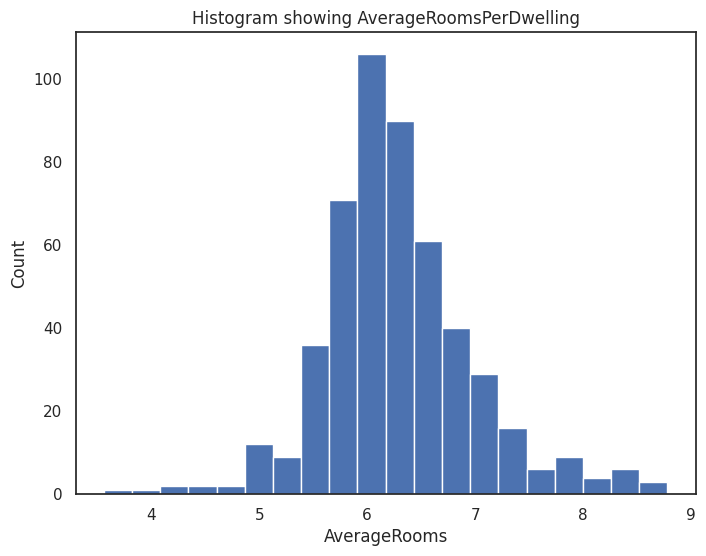

In [33]:
import matplotlib.pyplot as plt  # Import the Matplotlib library

# Your code for collecting and plotting the histogram
crimdf = 'rm'

# Creating a histogram using Spark's `histogram` method
hist_data = df.select(crimdf).rdd.flatMap(lambda x: x).collect()

# Plotting the histogram in the local environment
plt.figure(figsize=(8, 6))
plt.hist(hist_data, bins=20)
plt.title('Histogram showing AverageRoomsPerDwelling')
plt.xlabel('AverageRooms')
plt.ylabel('Count')
plt.show()


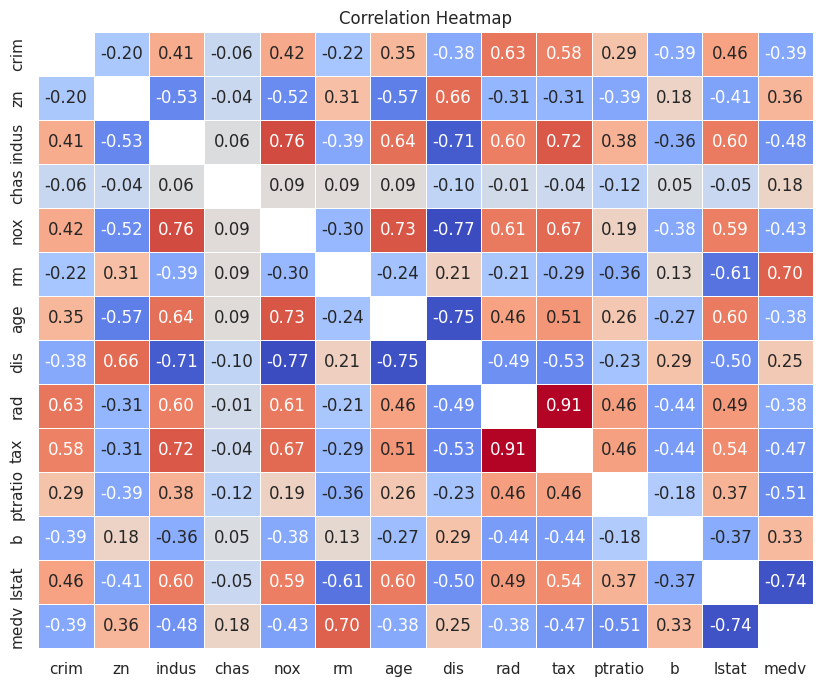

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Selecting numerical columns
num_col = [col_name for col_name, data_type in df.dtypes if data_type in ['int', 'double']]

# Calculating the correlation matrix for numerical columns
correlations = []
column_names = []

for i, col1 in enumerate(num_col):
    for col2 in num_col[i+1:]:
        corr_value = df.stat.corr(col1, col2)
        correlations.append(corr_value)
        column_names.append((col1, col2))

# Create a symmetric correlation matrix
n = len(num_col)
corr_matrix = [[None for _ in range(n)] for _ in range(n)]
k = 0
for i in range(n):
    for j in range(i + 1, n):
        corr_matrix[i][j] = correlations[k]
        corr_matrix[j][i] = correlations[k]
        k += 1

# Creating a DataFrame for the correlation matrix
corr_df = pd.DataFrame(corr_matrix, columns=num_col, index=num_col)

# Set the index and columns names to empty strings
corr_df.index.name = None
corr_df.columns.name = None

# Set up Seaborn style (optional)
sns.set(style="white")

# Plot the correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=False)
plt.title("Correlation Heatmap")
plt.show()


In [28]:
# Find the maximum correlation value and corresponding columns
max_corr = corr_df.max().max()  # Maximum correlation value
max_corr_columns = corr_df.stack().idxmax()  # Corresponding columns with maximum correlation

# Print the results
print("Maximum Correlation:", max_corr)
print("Columns with Maximum Correlation:", max_corr_columns)


Maximum Correlation: 0.9102281885331865
Columns with Maximum Correlation: ('rad', 'tax')


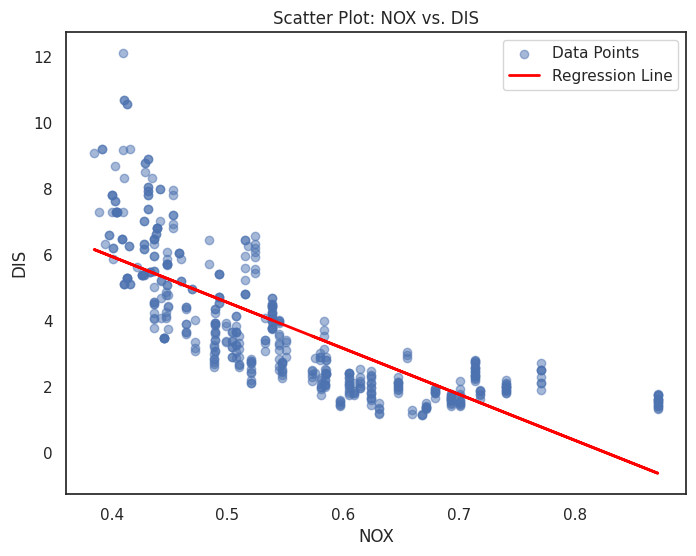

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Collect the data to the local environment
x_data = df.select("nox").rdd.flatMap(lambda x: x).collect()
y_data = df.select("dis").rdd.flatMap(lambda x: x).collect()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.5, label="Data Points")
plt.xlabel("NOX")
plt.ylabel("DIS")
plt.title("Scatter Plot: NOX vs. DIS")

# Perform linear regression
x_data = np.array(x_data).reshape(-1, 1)
y_data = np.array(y_data)
regression = LinearRegression().fit(x_data, y_data)
y_pred = regression.predict(x_data)

# Plot the regression line
plt.plot(x_data, y_pred, color='red', linewidth=2, label="Regression Line")

# Add a legend
plt.legend()

plt.show()


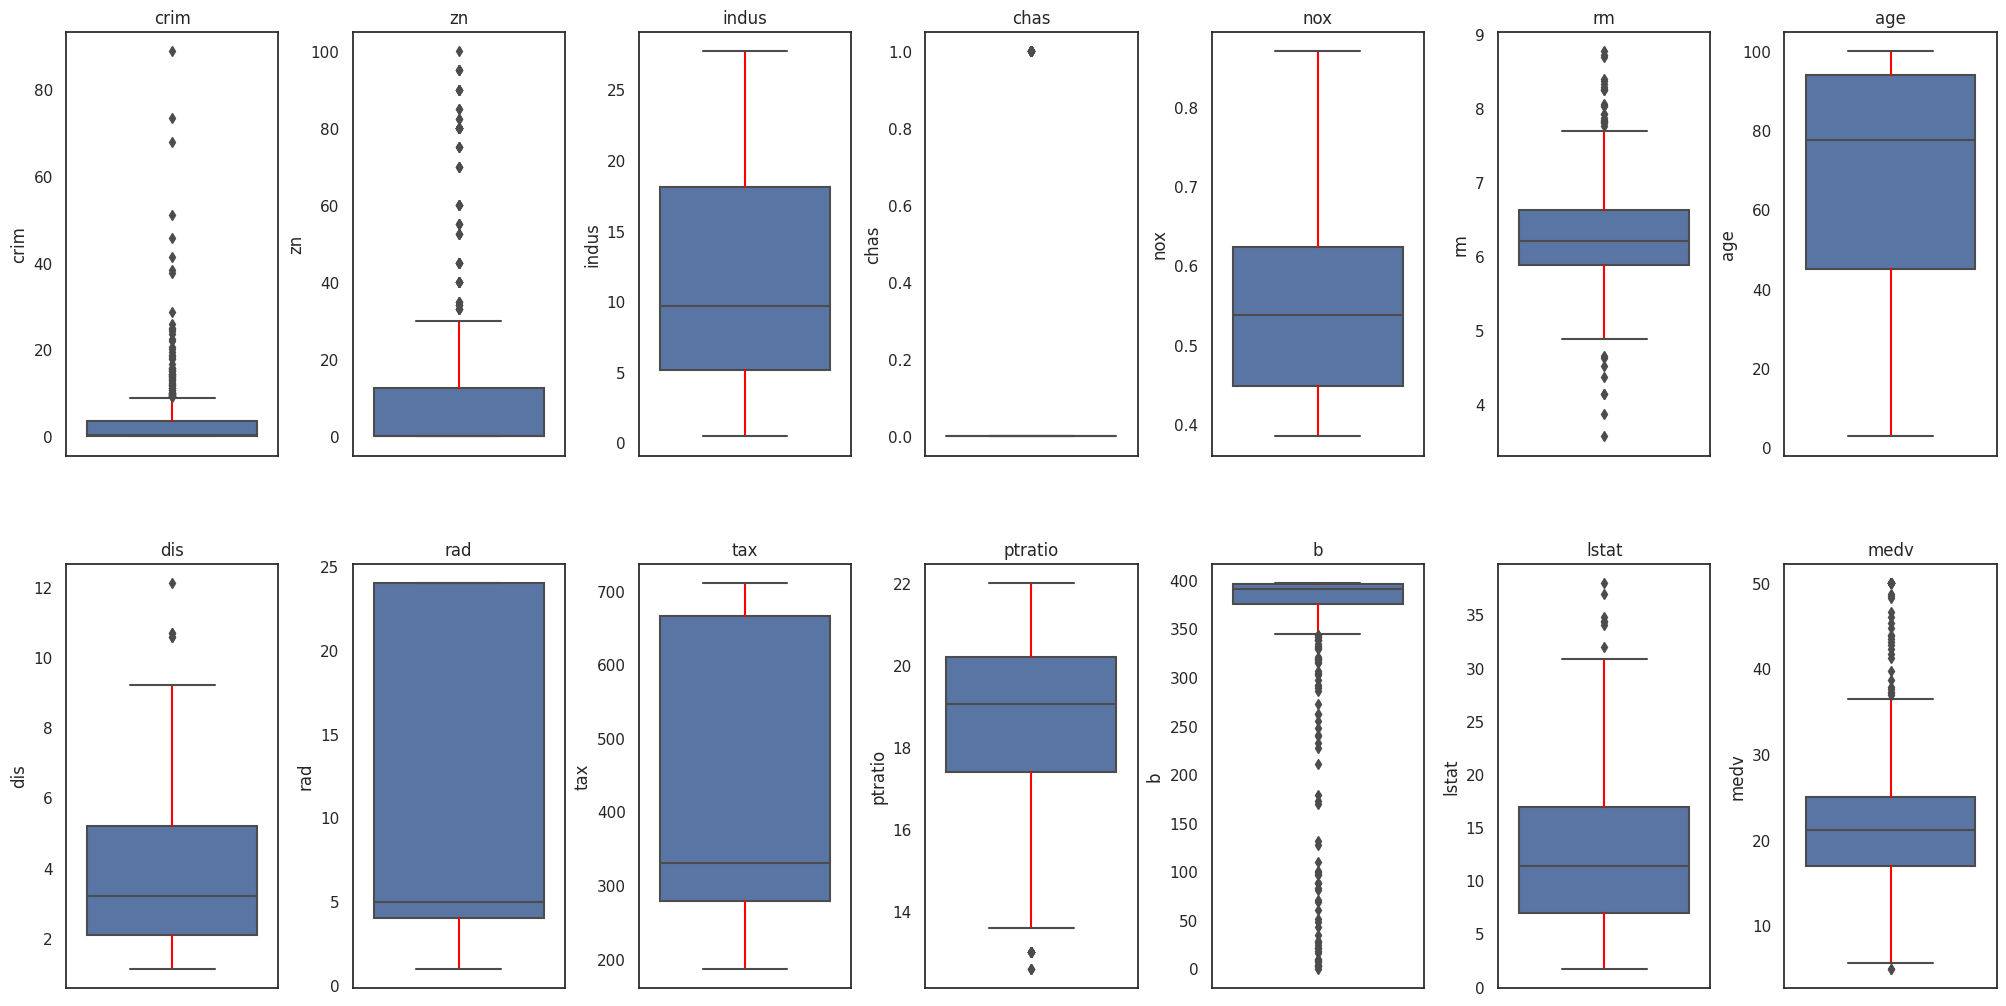

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create subplots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()

# Define the color for the whiskers
whisker_color = 'red'  # You can change this color as needed

# Loop through numerical columns and create box plots with colored whiskers
for index, column in enumerate(num_col):
    sns.boxplot(y=column, data=df.toPandas(), ax=axs[index], whiskerprops={'color': whisker_color})
    axs[index].set_title(column)

# Adjust subplot layout
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


<ipython-input-71-0295778168b3>:3: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=df.toPandas(), x="rm", y="medv", cmap="coolwarm", fill=True, shade_lowest=False, cbar=True, cbar_kws={'label': 'Density'})


RuntimeError: ignored

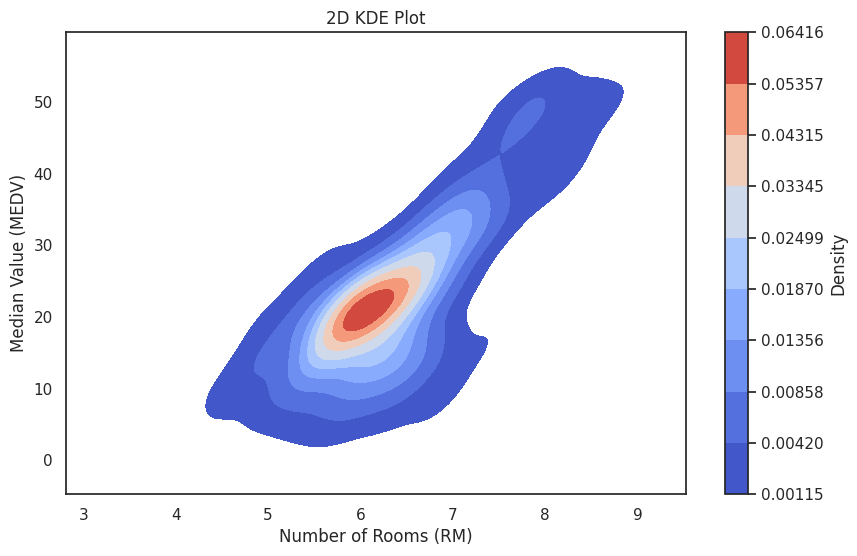

In [71]:

# Create a 2D KDE plot with custom color and shape
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df.toPandas(), x="rm", y="medv", cmap="coolwarm", fill=True, shade_lowest=False, cbar=True, cbar_kws={'label': 'Density'})
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("Median Value (MEDV)")
plt.title("2D KDE Plot")

# Customize the colorbar label
cbar = plt.colorbar()
cbar.set_label("Custom Density Label")

plt.show()

In [50]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Bucketizer
from pyspark.sql.functions import mean, min, max, count

# Create a Spark session
spark = SparkSession.builder.appName("HousingAnalysis").getOrCreate()

# Define bin thresholds for 'RM' values
bin_thresholds = [0, 5, 6, float('inf')]  # Bins: Low, Medium, High (Define your own thresholds)

# Create a Bucketizer to categorize 'RM' values into bins
bucketizer = Bucketizer(splits=bin_thresholds, inputCol="rm", outputCol="rm_bin")

# Drop the 'rm_bin' column if it exists
if "rm_bin" in df.columns:
    df = df.drop("rm_bin")

# Apply the Bucketizer transformation to the DataFrame and select necessary columns
df = bucketizer.transform(df).select("rm_bin", "medv")

# Group data by 'rm_bin' and calculate statistics
result = df.groupBy("rm_bin").agg(
    mean("medv").alias("avg_medv"),
    min("medv").alias("min_medv"),
    max("medv").alias("max_medv"),
    count("*").alias("count_records")
)

# Show or save the result as needed
result.show()


+------+------------------+--------+--------+-------------+
|rm_bin|          avg_medv|min_medv|max_medv|count_records|
+------+------------------+--------+--------+-------------+
|   0.0|             17.26|     7.0|    50.0|           15|
|   1.0|17.487341772151893|     5.0|    50.0|          158|
|   2.0| 25.16426426426426|     7.2|    50.0|          333|
+------+------------------+--------+--------+-------------+



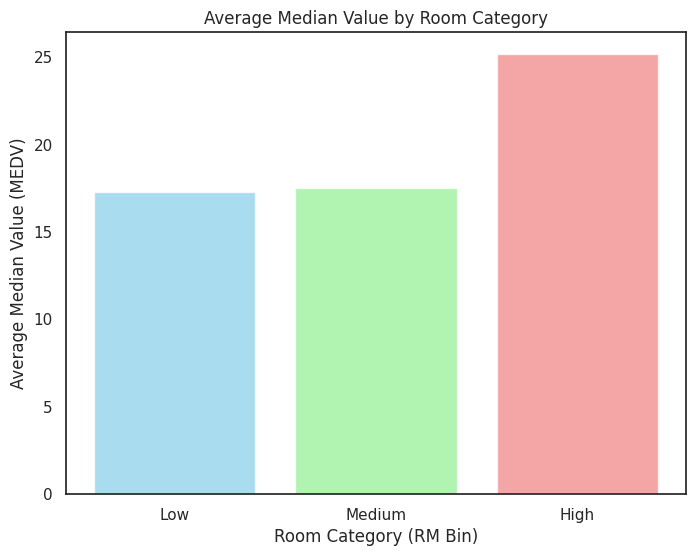

In [52]:
import matplotlib.pyplot as plt

# Extract data from the result DataFrame
rm_bins = result.select("rm_bin").rdd.flatMap(lambda x: x).collect()
avg_medv_values = result.select("avg_medv").rdd.flatMap(lambda x: x).collect()

# Define colors for each bar
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create a bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(rm_bins, avg_medv_values, color=colors, alpha=0.7)
plt.xlabel("Room Category (RM Bin)")
plt.ylabel("Average Median Value (MEDV)")
plt.title("Average Median Value by Room Category")
plt.xticks(rm_bins, ["Low", "Medium", "High"])
plt.show()


In [65]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.appName("BostonHousingAnalysis").getOrCreate()

# Load the Boston Housing dataset
df = spark.read.csv("/content/BostonHousing.csv", header=True, inferSchema=True)

# Calculate the minimum and maximum "RM" values for the entire DataFrame
min_rm = df.agg({"rm": "min"}).collect()[0][0]
max_rm = df.agg({"rm": "max"}).collect()[0][0]

# Number of bins
num_bins = 5

# Calculate bin size
bin_size = (max_rm - min_rm) / num_bins

# Calculate the bin index for each record
df = df.withColumn("bins", ((col("rm") - min_rm) / bin_size).cast("int"))

# Group by the bin and calculate statistics
bin_stats = df.groupBy("bins").agg(
    {"tax": "avg", "medv": "avg", "rm": "avg", "age": "avg", "crim": "avg"}
).withColumnRenamed("avg(tax)", "avg_tax").withColumnRenamed("avg(medv)", "avg_medv").withColumnRenamed("avg(rm)", "avg_rm").withColumnRenamed("avg(age)", "avg_age").withColumnRenamed("avg(crim)", "avg_crim")

# Order the results by the "bins" column
bin_stats = bin_stats.orderBy("bins")

# Show the results
bin_stats.show()


+----+------------------+------------------+-----------------+-----------------+-------------------+
|bins|           avg_tax|          avg_medv|           avg_rm|          avg_age|           avg_crim|
+----+------------------+------------------+-----------------+-----------------+-------------------+
|   0|             666.0|15.350000000000001|4.097833333333333|96.51666666666665| 20.520578333333333|
|   1|  495.728813559322| 15.86779661016949|5.349389830508475|88.35084745762713| 7.2335296610169495|
|   2|  410.015243902439|20.151829268292698|6.159429878048779|67.75670731707315|  3.148637560975608|
|   3| 354.4175824175824|30.345054945054947|7.037164835164835| 57.4747252747253| 2.5527067032967032|
|   4|281.95238095238096| 46.67619047619047|8.112809523809526|65.22857142857144|0.47702333333333347|
|   5|             666.0|              21.9|             8.78|             82.9|            3.47428|
+----+------------------+------------------+-----------------+-----------------+-----------

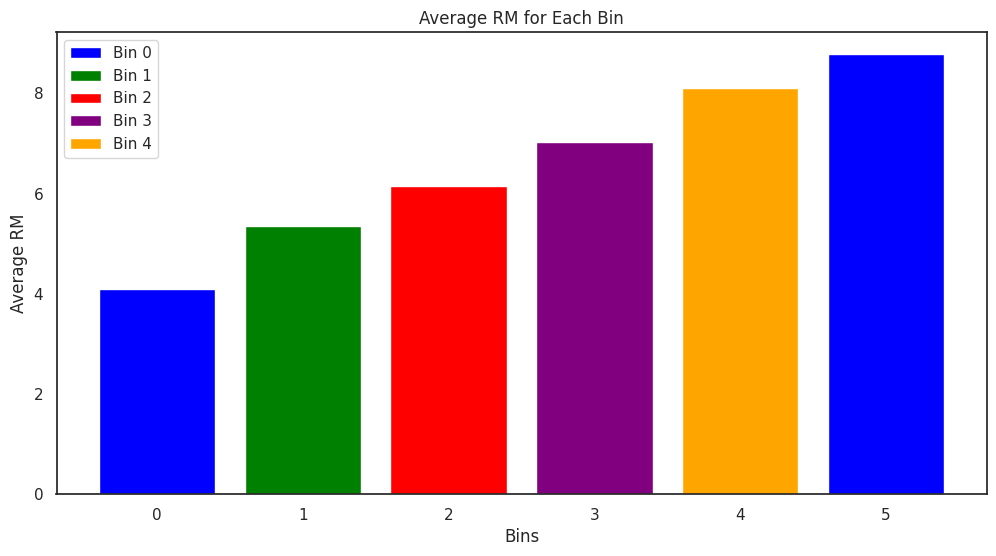

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a list of colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Convert the result to a Pandas DataFrame for visualization
bin_stats_pd = bin_stats.toPandas()

# Plot the results with different colors for each bar and labels
plt.figure(figsize=(12, 6))
bars = plt.bar(bin_stats_pd["bins"], bin_stats_pd["avg_rm"], color=colors)
plt.xlabel("Bins")
plt.ylabel("Average RM")
plt.title("Average RM for Each Bin")

# Define labels for the legend
legend_labels = ['Bin 0', 'Bin 1', 'Bin 2', 'Bin 3', 'Bin 4']

# Create a legend with the specified labels
plt.legend(bars, legend_labels)

plt.show()


In [58]:
df.columns


['rm_bin', 'medv', 'bins']

In [ ]:
spark.sparkContext.stop()